# Ejemplo de EDA: Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Carga de archivo csv desde una URL

In [2]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";") #index_col=0
df.head(5)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


## Conocer información básica

In [3]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns.values)

Cantidad de Filas y columnas: (252, 19)
Nombre columnas: ['alpha_2' 'alpha_3' 'area' 'capital' 'continent' 'currency_code'
 'currency_name' 'eqivalent_fips_code' 'fips' 'geoname_id' 'languages'
 'name' 'neighbours' 'numeric' 'phone' 'population' 'postal_code_format'
 'postal_code_regex' 'tld']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [5]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


## Matriz de Correlación

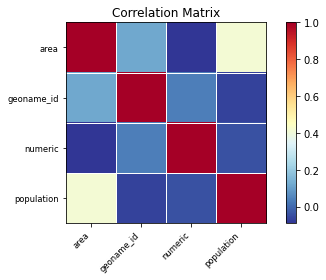

In [6]:
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

## Cargar una segunda fuente de datos

In [8]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head(10))

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
5  Afghanistan  1977    14880372
6  Afghanistan  1982    12881816
7  Afghanistan  1987    13867957
8  Afghanistan  1992    16317921
9  Afghanistan  1997    22227415


In [9]:
df_pop.shape

(1704, 3)

### Aqui vemos la población año tras año de España

In [10]:
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
df_pop_es.head()

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161


In [22]:
df_pop[df_pop["country"] == 'Peru' ]

,country,year,population
1200,Peru,1952,8025700
1201,Peru,1957,9146100
1202,Peru,1962,10516500
1203,Peru,1967,12132200
1204,Peru,1972,13954700
1205,Peru,1977,15990099
1206,Peru,1982,18125129
1207,Peru,1987,20195924
1208,Peru,1992,22430449
1209,Peru,1997,24748122


In [23]:
df_pop_pe = df_pop[df_pop["country"] == 'Peru' ]

In [11]:
df_pop_es.shape

(12, 3)

## Visualicemos datos

<AxesSubplot:>

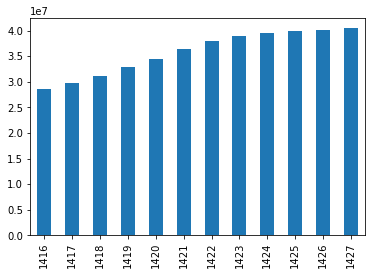

In [15]:
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

In [16]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]
df_pop_ar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


In [17]:
df_pop_ar.shape

(12, 3)

<AxesSubplot:xlabel='year'>

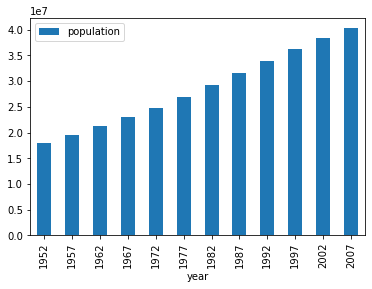

In [18]:
df_pop_ar.set_index('year').plot(kind='bar')

## Comparativa entre 2 países

In [20]:
df_pop_es['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

<AxesSubplot:>

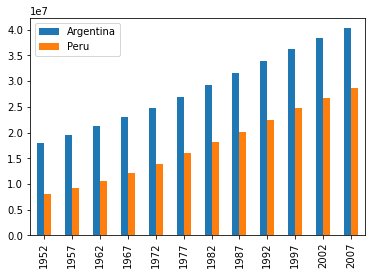

In [26]:
anios = df_pop_pe['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_pe = df_pop_pe['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                    'Peru': pop_pe}, 
                       index=anios)
df_plot.plot(kind='bar')

# Filtremos paises hispano-hablantes

In [29]:
df["languages"]

0                                        ca
1                         ar-AE,fa,en,hi,ur
2                         fa-AF,ps,uz-AF,tk
3                                     en-AG
4                                     en-AI
                       ...                 
247    zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr
248            en-ZM,bem,loz,lun,lue,ny,toi
249                          en-ZW,sn,nr,nd
250                             cu,hu,sq,sr
251                             nl-AN,en,es
Name: languages, Length: 252, dtype: object

In [42]:
df_frances = df.replace(np.nan, '', regex=True)
df_frances = df_frances[ df_frances['languages'].str.contains('fr') ]
df_frances

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
19,BE,BEL,30510.0,Brussels,EU,EUR,Euro,,BE,2802361,"nl-BE,fr-BE,de-BE",Belgium,"DE,NL,LU,FR",56,32,10403000,####,^(\d{4})$,.be
20,BF,BFA,274200.0,Ouagadougou,AF,XOF,Franc,,UV,2361809,fr-BF,Burkina Faso,"NE,BJ,GH,CI,TG,ML",854,226,16241811,,,.bf
23,BI,BDI,27830.0,Bujumbura,AF,BIF,Franc,,BY,433561,"fr-BI,rn",Burundi,"TZ,CD,RW",108,257,9863117,,,.bi
24,BJ,BEN,112620.0,Porto-Novo,AF,XOF,Franc,,BN,2395170,fr-BJ,Benin,"NE,TG,BF,NG",204,229,9056010,,,.bj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,VC,VCT,389.0,Kingstown,,XCD,Dollar,,VC,3577815,"en-VC,fr",Saint Vincent and the Grenadines,,670,+1-784,104217,,,.vc
241,VN,VNM,329560.0,Hanoi,AS,VND,Dong,,VM,1562822,"vi,en,fr,zh,km",Vietnam,"CN,LA,KH",704,84,89571130,######,^(\d{6})$,.vn
242,VU,VUT,12200.0,Port Vila,OC,VUV,Vatu,,NH,2134431,"bi,en-VU,fr-VU",Vanuatu,,548,678,221552,,,.vu
243,WF,WLF,274.0,Mata Utu,OC,XPF,Franc,,WF,4034749,"wls,fud,fr-WF",Wallis and Futuna,,876,681,16025,#####,^(986\d{2})$,.wf


In [43]:
df_frances.shape

(61, 19)

## Visualicemos por población

<AxesSubplot:xlabel='alpha_3'>

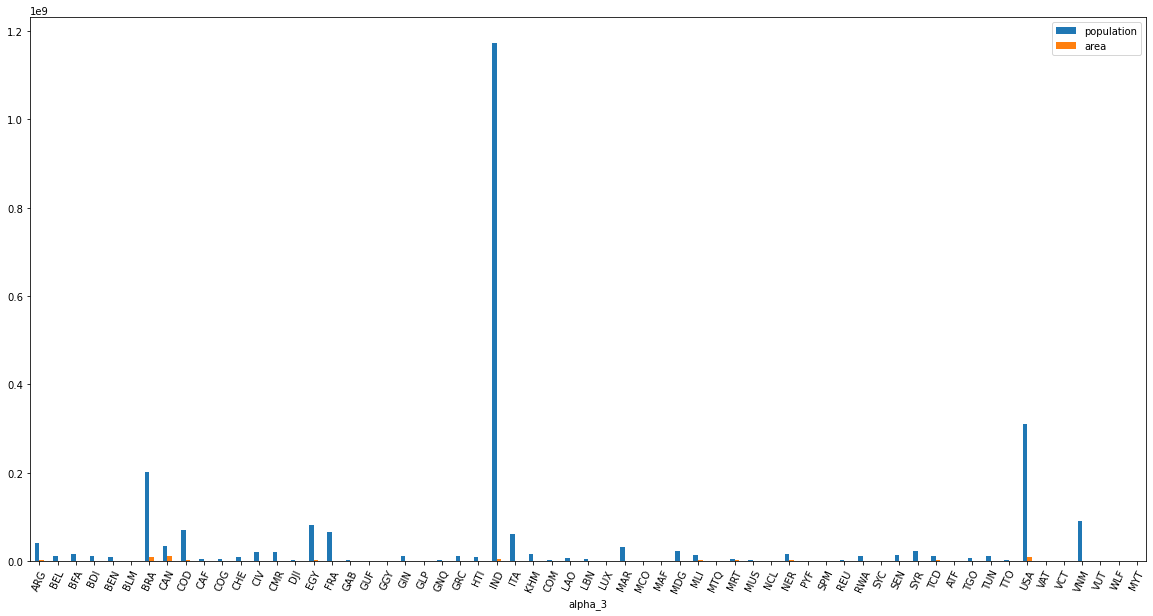

In [44]:
df_frances.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Detección de Outliers

In [45]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_frances.set_index('alpha_3')[['population']])

-270660794.4214015
351057261.2410736


['IND']

In [46]:
# Quitemos BRA y USA por ser outlies y volvamos a graficar:
df_frances.drop([30,233], inplace=True)

<AxesSubplot:xlabel='alpha_3'>

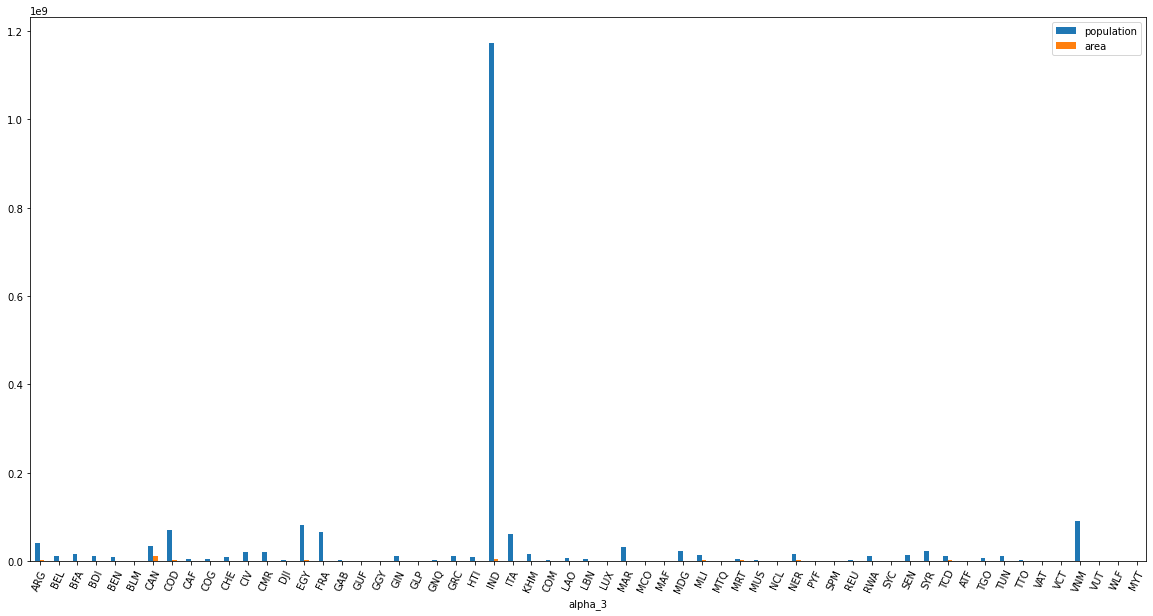

In [47]:
df_frances.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Graficamos ordenando por tamaño Población

<AxesSubplot:xlabel='alpha_3'>

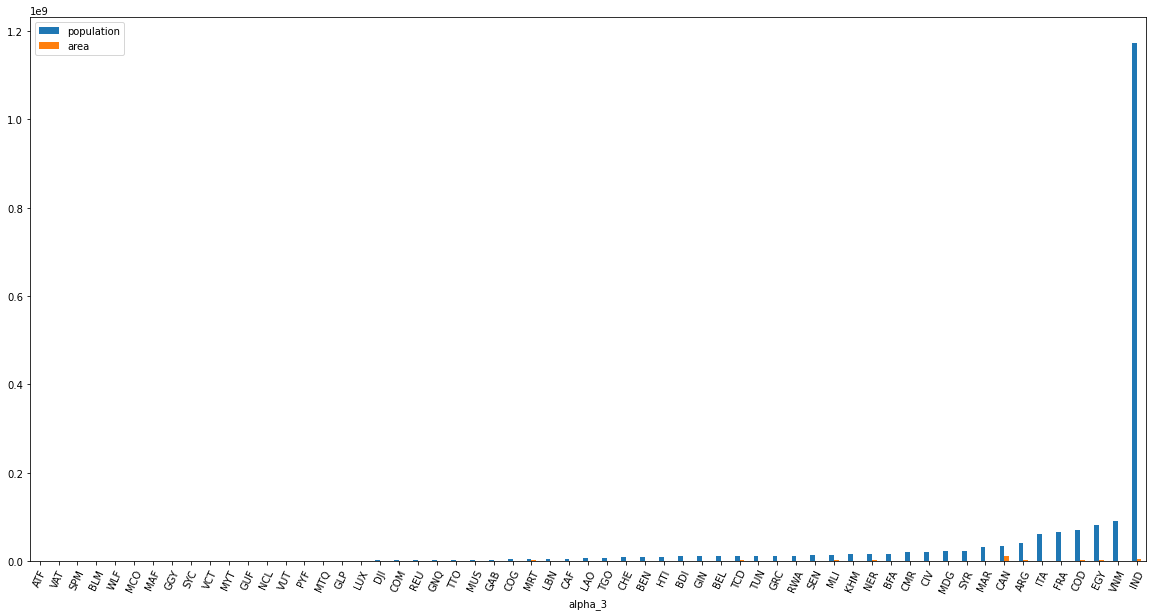

In [48]:
df_frances.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))

## Visualización por Área

In [49]:
4df_frances.set_index('alpha_3')[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

SyntaxError: invalid syntax (<ipython-input-49-d426f713e4be>, line 1)

In [50]:
# En este caso, podriamos quitar por "lo bajo", area menor a 110.000 km2:
df_2 = df_frances.set_index('alpha_3')
df_2 = df_2[df_2['area'] > 110000]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
BFA,BF,274200.0,Ouagadougou,AF,XOF,Franc,,UV,2361809,fr-BF,Burkina Faso,"NE,BJ,GH,CI,TG,ML",854,226,16241811,,,.bf
BEN,BJ,112620.0,Porto-Novo,AF,XOF,Franc,,BN,2395170,fr-BJ,Benin,"NE,TG,BF,NG",204,229,9056010,,,.bj
CAN,CA,9984670.0,Ottawa,,CAD,Dollar,,CA,6251999,"en-CA,fr-CA,iu",Canada,US,124,1,33679000,@#@ #@#,^([ABCEGHJKLMNPRSTVXY]\d[ABCEGHJKLMNPRSTVWXYZ]...,.ca
COD,CD,2345410.0,Kinshasa,AF,CDF,Franc,,CG,203312,"fr-CD,ln,kg",Democratic Republic of the Congo,"TZ,CF,SS,RW,ZM,BI,UG,CG,AO",180,243,70916439,,,.cd
CAF,CF,622984.0,Bangui,AF,XAF,Franc,,CT,239880,"fr-CF,sg,ln,kg",Central African Republic,"TD,SD,CD,SS,CM,CG",140,236,4844927,,,.cf
COG,CG,342000.0,Brazzaville,AF,XAF,Franc,,CF,2260494,"fr-CG,kg,ln-CG",Republic of the Congo,"CF,GA,CD,CM,AO",178,242,3039126,,,.cg
CIV,CI,322460.0,Yamoussoukro,AF,XOF,Franc,,IV,2287781,fr-CI,Ivory Coast,"LR,GH,GN,BF,ML",384,225,21058798,,,.ci
CMR,CM,475440.0,Yaounde,AF,XAF,Franc,,CM,2233387,"en-CM,fr-CM",Cameroon,"TD,CF,GA,GQ,CG,NG",120,237,19294149,,,.cm


<AxesSubplot:xlabel='alpha_3'>

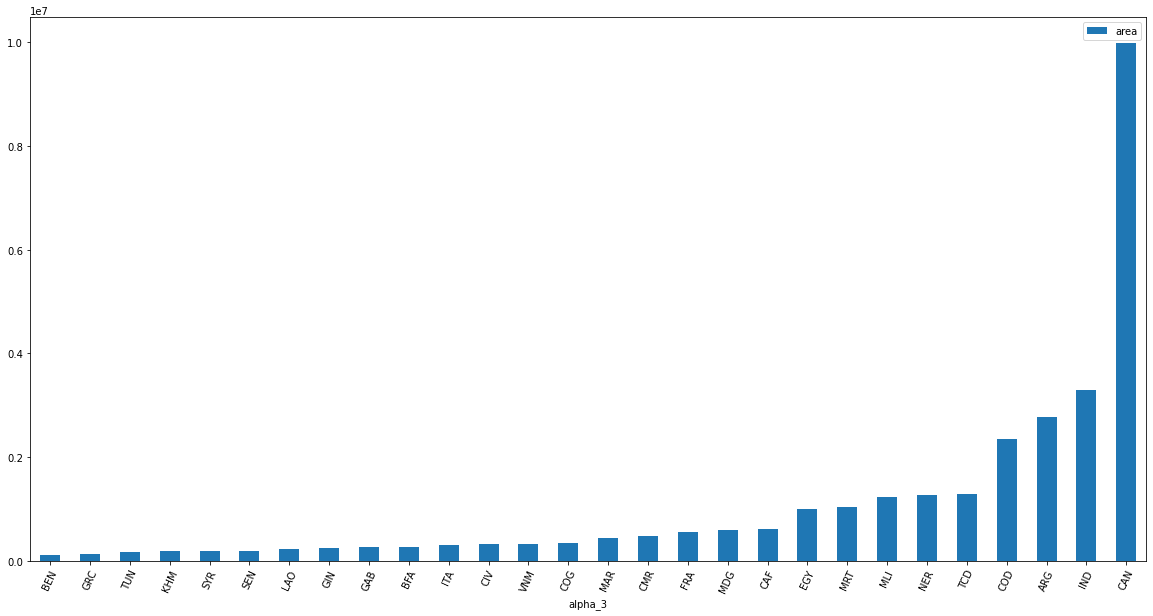

In [51]:
df_2[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))